In [623]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np


In [624]:
white_wine_with_dup = pd.read_csv('winequality-white.csv', sep=';')

In [625]:
white_wine_with_dup.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [626]:
white_wine_with_dup.shape

(4898, 12)

In [627]:
white_wine_with_dup.duplicated().sum()

937

In [628]:
white_wine=white_wine_with_dup.drop_duplicates().reset_index(drop=True)

In [629]:
white_wine.shape

(3961, 12)

## Adding label column

In [630]:
white_wine ['quality_label'] = white_wine['quality'].apply(
lambda value: 'low'
    if value <= 5 
    else 'medium' if value <= 7 
    else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

## quality_label distribution

In [631]:
# Getting the counts of each label
counts = white_wine['quality_label'].value_counts()

# Accessing each count individually
low_count = counts.get('low', 0)  # Gets the count for 'low', defaults to 0 if 'low' is not found
medium_count = counts.get('medium', 0)  # Gets the count for 'medium', defaults to 0 if 'medium' is not found
high_count = counts.get('high', 0)  # Gets the count for 'high', defaults to 0 if 'high' is not found

# Printing the counts
print(f"Low quality count: {low_count}")
print(f"Medium quality count: {medium_count}")
print(f"High quality count: {high_count}")

Low quality count: 1348
Medium quality count: 2477
High quality count: 136


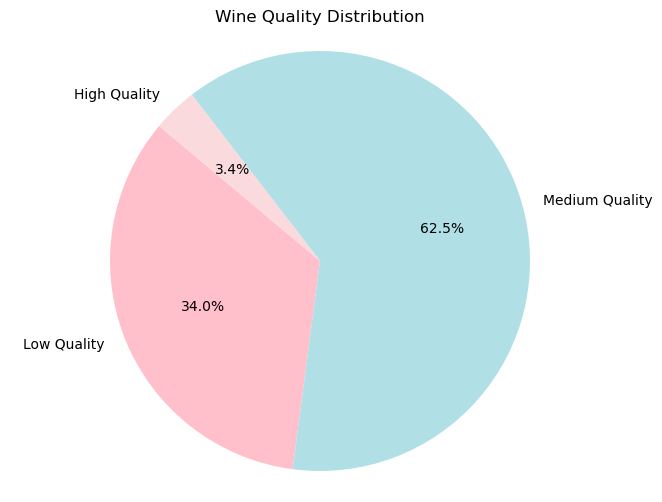

In [632]:
import matplotlib.pyplot as plt

# Data
labels = ['Low Quality', 'Medium Quality', 'High Quality']
sizes = [1348, 2477, 136]
colors = ['#FFC0CB', '#B0E0E6', '#FADADD']  # Pastel pink, blue, and lighter pink

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Wine Quality Distribution')
plt.show()

## Adding Wine Type 

In [633]:
#red_wine['wine_type'] = 'Red'
#white_wine['wine_type'] = 'White'

In [634]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Encoding Label

In [635]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
white_wine['quality_label'] = label_encoder.fit_transform(white_wine['quality_label'])

# Unique species after label encoding
print(white_wine['quality_label'].unique())

[2 1 0]


## Correlation Matrix

In [636]:
correlation_matrix = white_wine.corr()

# Extract correlations of 'quality_label' with other features
quality_label_correlations = correlation_matrix['quality_label'].sort_values()

# Print the correlations
print("Correlations of 'quality_label' with other features:")
print(quality_label_correlations)

Correlations of 'quality_label' with other features:
volatile acidity       -0.197907
density                -0.161141
chlorides              -0.113030
total sulfur dioxide   -0.101404
residual sugar         -0.070526
fixed acidity          -0.054221
free sulfur dioxide    -0.001423
citric acid             0.006693
sulphates               0.051534
pH                      0.053837
alcohol                 0.209572
quality                 0.382557
quality_label           1.000000
Name: quality_label, dtype: float64


### Drop Columns

In [637]:
columns_to_drop = ['quality']


white_wine = white_wine.drop(columns=columns_to_drop)

## IQR - Outliners

In [638]:
# Calculate Q1, Q3, and IQR 

Q1 = white_wine['volatile acidity'].quantile(0.25)
Q3 = white_wine['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers = white_wine[(white_wine['volatile acidity'] < lower_bound) | (white_wine['volatile acidity'] > upper_bound)]

# Remove
white_wine_filtered = white_wine[(white_wine['volatile acidity'] >= lower_bound) & (white_wine['volatile acidity'] <= upper_bound)]

print(f"Original dataset size: {len(white_wine)}")
print(f"Filtered dataset size: {len(white_wine_filtered)}")
print(f"Number of outliers removed: {len(outliers)}")

Original dataset size: 3961
Filtered dataset size: 3828
Number of outliers removed: 133


In [639]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality_label         3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [640]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(class_mapping)

{'high': 0, 'low': 1, 'medium': 2}


In [641]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,2


## Split

In [642]:
from sklearn.model_selection import train_test_split    

# Split data into features (X) and target (y)
# Ensure 'quality_label' is not included in the encoded columns if it's your target variable
X = white_wine.drop(['quality_label'] , axis = 1)
y = white_wine['quality_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=52)

## Building Model

### Logistic Regression 

In [643]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
lr_model_white = LogisticRegression(random_state=42)

#fit model
lr_model_white.fit(X_train, y_train)

# Make predictions on the test set
pred=lr_model_white.predict(X_test)

# import accuracy_score  metric
from sklearn.metrics import  accuracy_score 

# Calculate and print the accuracy score
acc_lr = accuracy_score(y_test, pred)

print(acc_lr)

0.6620428751576293


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion Matrix 

In [644]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[  0,   2,  24],
       [  1, 122, 161],
       [  1,  79, 403]])

In [645]:

from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.6326803496108188
Recall: 0.6620428751576293
F1-Score: 0.6378080418502661


## Model Random Forrest 

In [646]:
# import Random Forest Classifier model
from  sklearn.ensemble import RandomForestClassifier

# Building model 
rf_model_white =  RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model 
rf_model_white.fit(X_train, y_train)

# Predict 
pred = rf_model_white.predict(X_test)

# Evaluate 
acc_rf = accuracy_score(y_test, pred)
print(acc_rf)

0.7326607818411097


In [647]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[  0,   2,  24],
       [  0, 164, 120],
       [  1,  65, 417]])

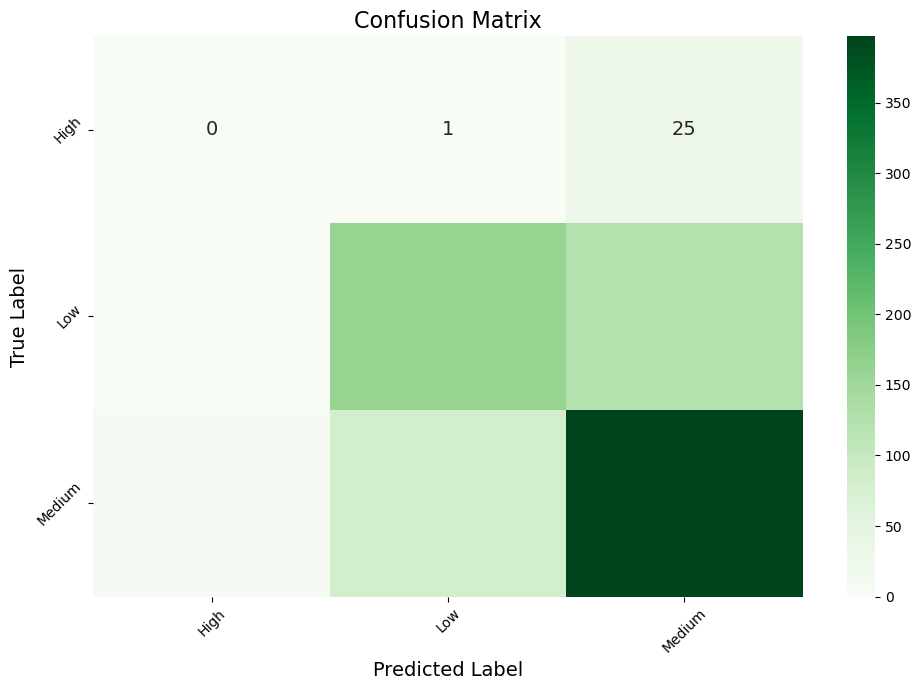

In [648]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample confusion matrix data
confusion_matrix = np.array([[0, 1, 25],
                             [0, 161, 123],
                             [6, 80, 397]])

# Labels for the classes
class_labels = ['High', 'Low', 'Medium']

# Ensuring the annot=True parameter works as intended for all cells
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})

# Adding the heatmap aesthetics
plt.title('Confusion Matrix', size=16)
plt.ylabel('True Label', size=14)
plt.xlabel('Predicted Label', size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the heatmap
plt.show()

### Model Support Vector Machines SVM

In [649]:
# Import Support Vector Machine Classifier model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Building the SVM model
svm_model_white = SVC(random_state=453)

# Fit model
svm_model_white.fit(X_train, y_train)

# Predict
pred = svm_model_white.predict(X_test)

# Evaluate
acc_svm = accuracy_score(y_test, pred)
print(acc_svm)

0.6141235813366961


## Model Gradient Boosting

In [650]:
# Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Building the Gradient Boosting model
gb_model_white = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=453)

# Fit model
gb_model_white.fit(X_train, y_train)

# Predict
pred = gb_model_white.predict(X_test)

# Evaluate
acc_gb = accuracy_score(y_test, pred)
print(acc_gb)

0.7036569987389659


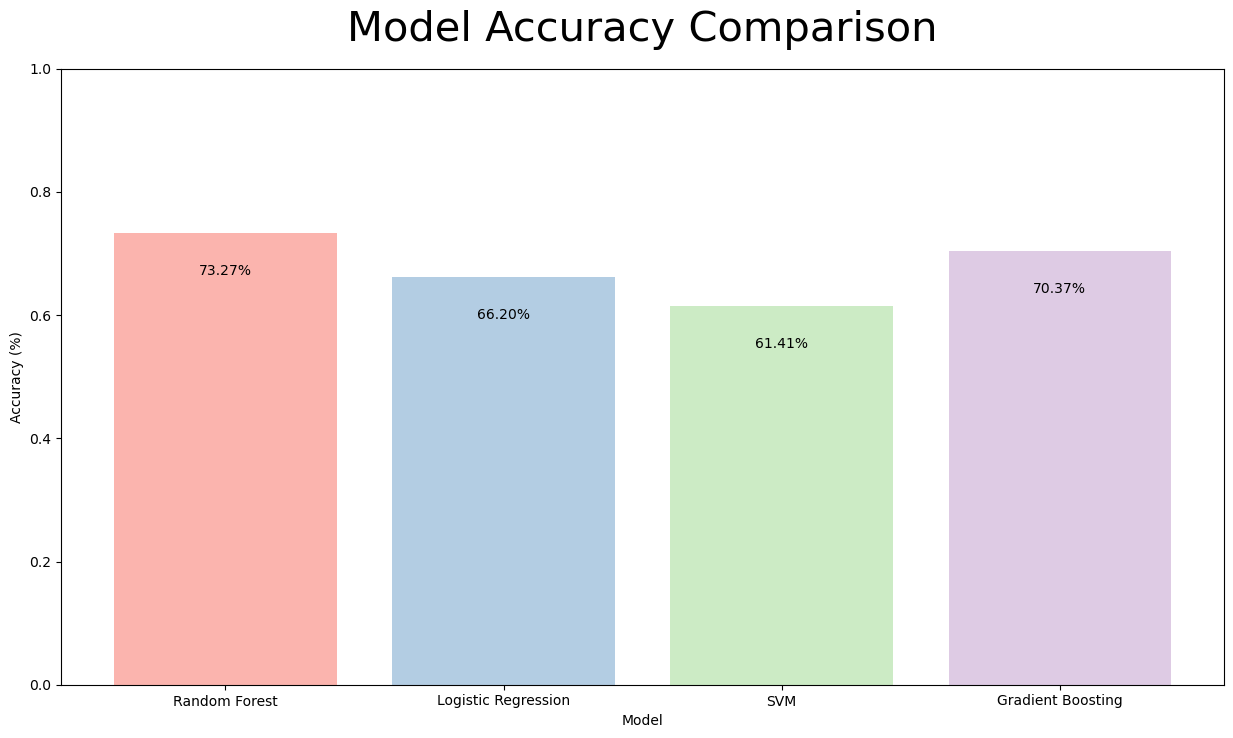

In [651]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
accuracies = [acc_rf, acc_lr, acc_svm, acc_gb]

# Using a pastel palette
colors = plt.cm.Pastel1.colors

plt.figure(figsize=(15, 8))

# Creating the bar chart
bars = plt.bar(models, accuracies, color=colors)

plt.title('Model Accuracy Comparison',fontsize=30, pad=20)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1 (or 0% and 100%)

# Adding the percentage text inside each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f"{yval*100:.2f}%", ha='center', va='top', color='black')

plt.show()

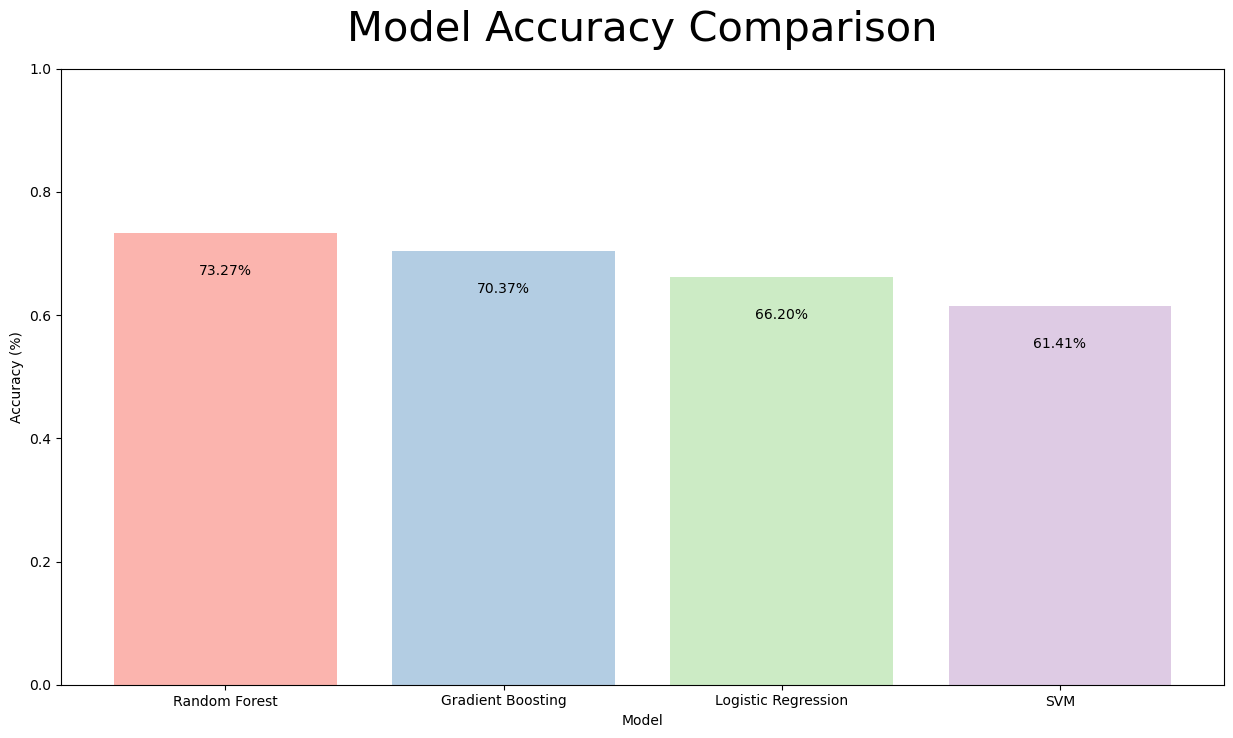

In [652]:
import matplotlib.pyplot as plt


# Model names and their corresponding accuracies
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
accuracies = [acc_rf, acc_lr, acc_svm, acc_gb]

# Sorting the models and accuracies together in descending order of accuracy
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Using a pastel palette
colors = plt.cm.Pastel1.colors

plt.figure(figsize=(15, 8))

# Creating the bar chart with sorted values
bars = plt.bar(sorted_models, sorted_accuracies, color=colors[:len(sorted_models)])

plt.title('Model Accuracy Comparison',fontsize=30, pad=20)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1 (or 0% and 100%)

# Adding the percentage text inside each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f"{yval*100:.2f}%", ha='center', va='top', color='black')

plt.show()

## Model with Gradient Boosting 

In [538]:
# Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Building the Gradient Boosting model
gb_model_white = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=453)

# Fit model
gb_model_white.fit(X_train, y_train)

# Predict
pred = gb_model_white.predict(X_test)

# Evaluate
acc_gb = accuracy_score(y_test, pred)
print(acc_gb)

0.7036569987389659


### Confusion Matrix

In [539]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[  0,   1,  25],
       [  0, 161, 123],
       [  6,  80, 397]])

In [540]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(class_mapping)

{'high': 0, 'low': 1, 'medium': 2}


In [541]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        26
         low       0.67      0.57      0.61       284
      medium       0.73      0.82      0.77       483

    accuracy                           0.70       793
   macro avg       0.46      0.46      0.46       793
weighted avg       0.68      0.70      0.69       793



## Stratified Kfold with accuracy per folder and average accuracy

In [542]:
print('Class Ratio:',sum(white_wine['quality_label'])/len(white_wine['quality_label']))


Class Ratio: 1.5910123706134816


### Average Accuracy with Logistic Regression

In [543]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Assuming 'white_wine' is your DataFrame and 'quality_label' is the column for stratification
target = white_wine['quality_label']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies for later averaging
accuracies = []

# Enumerate over folds, starting from 1
for fold_no, (train_index, test_index) in enumerate(skf.split(white_wine, target), start=1):
    # Create training and testing sets
    X_train = white_wine.iloc[train_index].drop(['quality_label'], axis=1)
    y_train = white_wine.iloc[train_index]['quality_label']
    X_test = white_wine.iloc[test_index].drop(['quality_label'], axis=1)
    y_test = white_wine.iloc[test_index]['quality_label']
    
    # Initialize and train the logistic regression model
    lr_model_white = LogisticRegression(max_iter=1000)
    lr_model_white.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    pred = lr_model_white.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)
    
    # Print accuracy for the current fold
    print(f'Fold {fold_no} Accuracy: {accuracy:.4f}')

# Print average accuracy after all folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f'\nAverage Accuracy: {average_accuracy:.4f}')

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Accuracy: 0.7201


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 Accuracy: 0.7083


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 Accuracy: 0.7222


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 Accuracy: 0.7260
Fold 5 Accuracy: 0.6932

Average Accuracy: 0.7140


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Balanced Accuracy

In [544]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Assuming 'white_wine' is your DataFrame and 'quality_label' is the column for stratification
target = white_wine['quality_label']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store balanced accuracies for later averaging
balanced_accuracies = []

# Enumerate over folds, starting from 1
for fold_no, (train_index, test_index) in enumerate(skf.split(white_wine, target), start=1):
    # Create training and testing sets
    X_train = white_wine.iloc[train_index].drop(['quality_label'], axis=1)
    y_train = white_wine.iloc[train_index]['quality_label']
    X_test = white_wine.iloc[test_index].drop(['quality_label'], axis=1)
    y_test = white_wine.iloc[test_index]['quality_label']
    
    # Initialize and train the logistic regression model
    lr_model_white = LogisticRegression(max_iter=1000)
    lr_model_white.fit(X_train, y_train)
    
    # Predict and calculate balanced accuracy
    pred = lr_model_white.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, pred)
    balanced_accuracies.append(balanced_accuracy)
    
    # Print balanced accuracy for the current fold
    print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')

# Print average balanced accuracy after all folds
average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')

/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Balanced Accuracy: 0.4614


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 Balanced Accuracy: 0.4519


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 Balanced Accuracy: 0.4626


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 Balanced Accuracy: 0.4663
Fold 5 Balanced Accuracy: 0.4471

Average Balanced Accuracy: 0.4579


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [545]:
print(classification_report(y_test, pred, target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        27
         low       0.62      0.51      0.56       270
      medium       0.72      0.83      0.77       495

    accuracy                           0.69       792
   macro avg       0.45      0.45      0.44       792
weighted avg       0.66      0.69      0.67       792



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Function X Model and Oversampling 

In [546]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

def evaluate_model_with_oversampling(model, data, target_column, n_splits=5, random_state=42):

    target = data[target_column]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    balanced_accuracies = []
    
    # Initialize RandomOverSampler and the given model within a pipeline
    pipeline = make_pipeline(RandomOverSampler(random_state=random_state), model)
    
    for fold_no, (train_index, test_index) in enumerate(skf.split(data, target), start=1):
        # Create training and testing sets
        X_train = data.iloc[train_index].drop([target_column], axis=1)
        y_train = data.iloc[train_index][target_column]
        X_test = data.iloc[test_index].drop([target_column], axis=1)
        y_test = data.iloc[test_index][target_column]
        
        # Fit the pipeline on the training set and predict on the testing set
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        
        # Calculate and store the balanced accuracy
        balanced_accuracy = balanced_accuracy_score(y_test, pred)
        balanced_accuracies.append(balanced_accuracy)
        
        # Print balanced accuracy for the current fold
        print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')
    
    # Print average balanced accuracy after all folds
    average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')



## Oversampling and Logistic Regression

In [547]:
# Example usage:
from sklearn.linear_model import LogisticRegression


# Assuming 'white_wine' is your DataFrame and 'quality_label' is the target column
model = LogisticRegression(max_iter=1000)


# Evaluate Logistic Regression
evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)



/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Balanced Accuracy: 0.5706


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 Balanced Accuracy: 0.6146


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 Balanced Accuracy: 0.5767


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 Balanced Accuracy: 0.5996
Fold 5 Balanced Accuracy: 0.6310

Average Balanced Accuracy: 0.5985


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Oversampling and Random Forest

In [548]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)



Fold 1 Balanced Accuracy: 0.5102
Fold 2 Balanced Accuracy: 0.5069
Fold 3 Balanced Accuracy: 0.4953
Fold 4 Balanced Accuracy: 0.5184
Fold 5 Balanced Accuracy: 0.5226

Average Balanced Accuracy: 0.5107


## Oversampling and Support Vector Machines SVM

In [549]:
from sklearn.svm import SVC
model = SVC(random_state=42)
evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5102
Fold 2 Balanced Accuracy: 0.5069
Fold 3 Balanced Accuracy: 0.4953
Fold 4 Balanced Accuracy: 0.5184
Fold 5 Balanced Accuracy: 0.5226

Average Balanced Accuracy: 0.5107


## Oversampling and Gradient Boosting

In [550]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5102
Fold 2 Balanced Accuracy: 0.5069
Fold 3 Balanced Accuracy: 0.4953
Fold 4 Balanced Accuracy: 0.5184
Fold 5 Balanced Accuracy: 0.5226

Average Balanced Accuracy: 0.5107


## Oversampling with K Nearest Neighbor

In [551]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.4875
Fold 2 Balanced Accuracy: 0.4237
Fold 3 Balanced Accuracy: 0.3966
Fold 4 Balanced Accuracy: 0.4432
Fold 5 Balanced Accuracy: 0.4653

Average Balanced Accuracy: 0.4433


## Function undersampling with x Model

In [552]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler
from imblearn.pipeline import make_pipeline

def evaluate_model_with_undersampling(model, data, target_column, n_splits=5, random_state=42):
    target = data[target_column]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    balanced_accuracies = []
    
    # Initialize RandomUnderSampler and the given model within a pipeline
    pipeline = make_pipeline(RandomUnderSampler(random_state=random_state), model)
    
    for fold_no, (train_index, test_index) in enumerate(skf.split(data, target), start=1):
        # Create training and testing sets
        X_train = data.iloc[train_index].drop([target_column], axis=1)
        y_train = data.iloc[train_index][target_column]
        X_test = data.iloc[test_index].drop([target_column], axis=1)
        y_test = data.iloc[test_index][target_column]
        
        # Fit the pipeline on the training set and predict on the testing set
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        
        # Calculate and store the balanced accuracy
        balanced_accuracy = balanced_accuracy_score(y_test, pred)
        balanced_accuracies.append(balanced_accuracy)
        
        # Print balanced accuracy for the current fold
        print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')
    
    # Print average balanced accuracy after all folds
    average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')

## Undersampling with GradientBoosting

In [553]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5878
Fold 2 Balanced Accuracy: 0.5957
Fold 3 Balanced Accuracy: 0.5604
Fold 4 Balanced Accuracy: 0.5557
Fold 5 Balanced Accuracy: 0.6320

Average Balanced Accuracy: 0.5863


## Undersampling with SVM

In [554]:
from sklearn.svm import SVC
model = SVC(random_state=42)
evaluate_model_with_oversampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.4960
Fold 2 Balanced Accuracy: 0.5256
Fold 3 Balanced Accuracy: 0.4965
Fold 4 Balanced Accuracy: 0.5114
Fold 5 Balanced Accuracy: 0.5039

Average Balanced Accuracy: 0.5067


## Undersampling with Logistic Regression

In [323]:
model = LogisticRegression(max_iter=1000)

evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5652


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Fold 2 Balanced Accuracy: 0.5888
Fold 3 Balanced Accuracy: 0.5649
Fold 4 Balanced Accuracy: 0.5829
Fold 5 Balanced Accuracy: 0.6358

Average Balanced Accuracy: 0.5875


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

## Undersampling with random Forest 

In [324]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5993
Fold 2 Balanced Accuracy: 0.5970
Fold 3 Balanced Accuracy: 0.5738
Fold 4 Balanced Accuracy: 0.6135
Fold 5 Balanced Accuracy: 0.6648

Average Balanced Accuracy: 0.6097


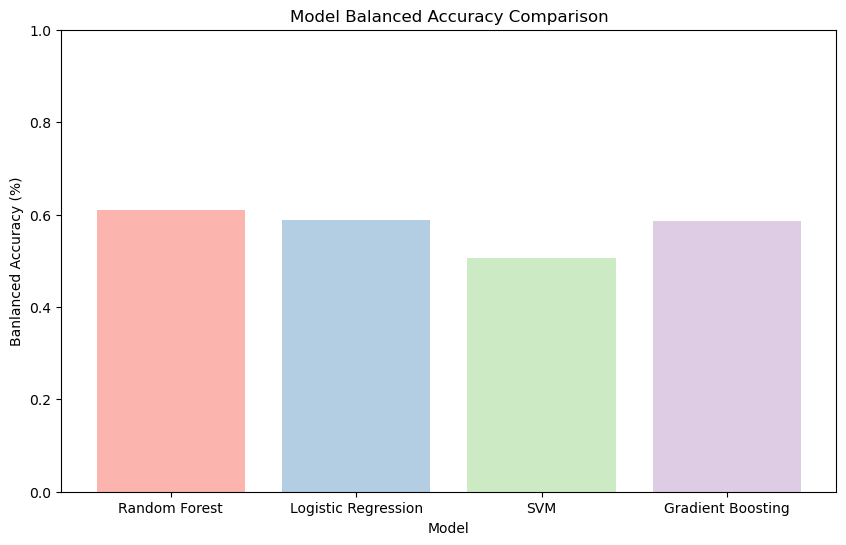

In [555]:
import matplotlib.pyplot as plt

# Placeholder accuracy scores
acc_rf = 0.609  # Random Forest
acc_lr = 0.588  # Logistic Regression
acc_svm = 0.506 # Support Vector Machines
acc_gb = 0.586  # Gradient Boosting

# Model names and their corresponding accuracies
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
accuracies = [acc_rf, acc_lr, acc_svm, acc_gb]

# Using a pastel palette
colors = plt.cm.Pastel1.colors

plt.figure(figsize=(10, 6))

# Creating the bar chart
plt.bar(models, accuracies, color=colors)

plt.title('Model Balanced Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Banlanced Accuracy (%)')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1 (or 0% and 100%)

plt.show()

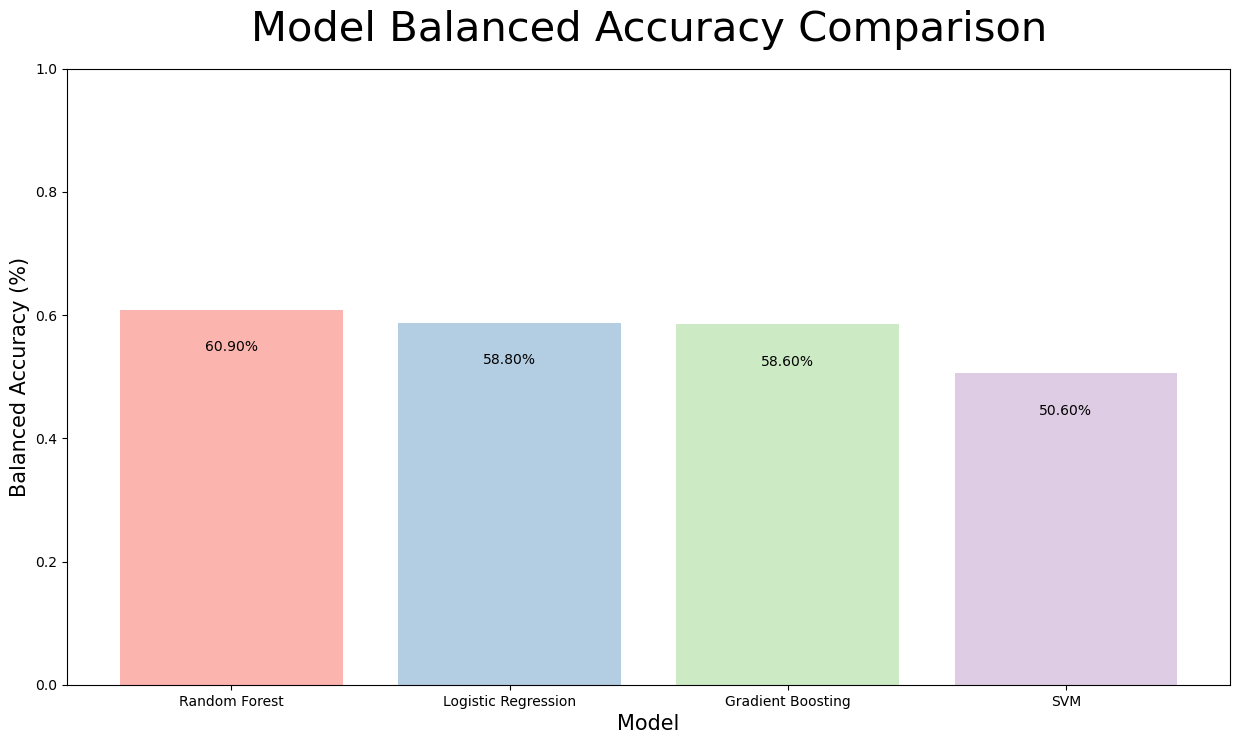

In [560]:
import matplotlib.pyplot as plt

# Placeholder accuracy scores
acc_rf = 0.609  # Random Forest
acc_lr = 0.588  # Logistic Regression
acc_svm = 0.506 # Support Vector Machines
acc_gb = 0.586  # Gradient Boosting

# Model names and their corresponding accuracies
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
accuracies = [acc_rf, acc_lr, acc_svm, acc_gb]

# Sorting the models based on their accuracies from highest to lowest
sorted_models = [x for _, x in sorted(zip(accuracies, models), reverse=True)]
sorted_accuracies = sorted(accuracies, reverse=True)

# Using a pastel palette
colors = plt.cm.Pastel1.colors

plt.figure(figsize=(15, 8))

# Creating the bar chart
bars = plt.bar(sorted_models, sorted_accuracies, color=colors)

plt.title('Model Balanced Accuracy Comparison',fontsize=30, pad=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Balanced Accuracy (%)',fontsize=15)
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1 (or 0% and 100%)

# Adding the percentage text inside each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05, f"{yval*100:.2f}%", ha='center', va='top', color='black')

plt.show()

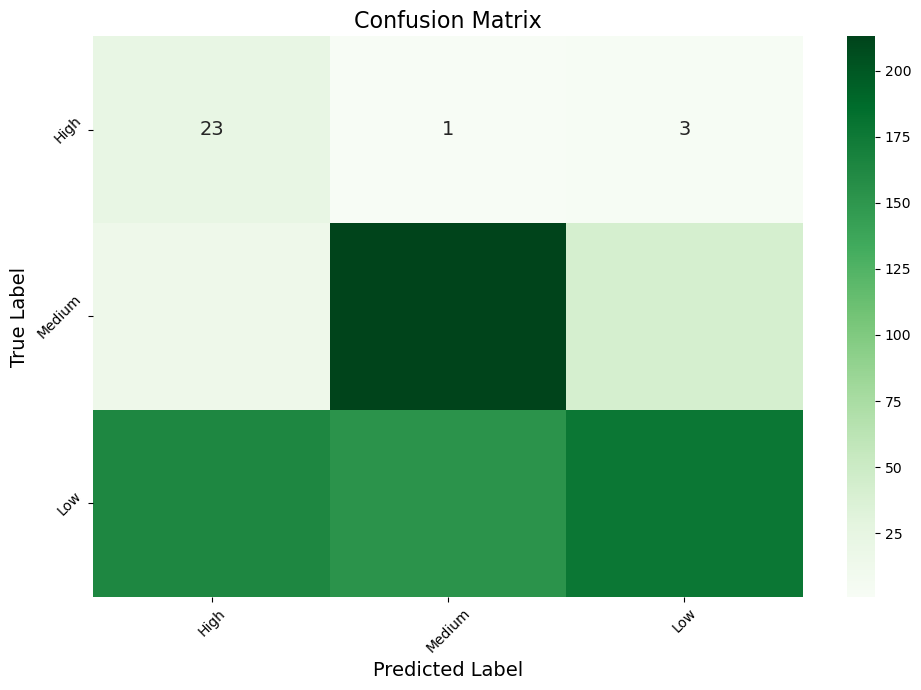

In [563]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample confusion matrix data
confusion_matrix = np.array([[ 23,   1,   3],
       [ 15, 213,  42],
       [164, 153, 178]])
# Labels for the classes
class_labels = ['High', 'Medium', 'Low']

# Ensuring the annot=True parameter works as intended for all cells
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})

# Adding the heatmap aesthetics
plt.title('Confusion Matrix', size=16)
plt.ylabel('True Label', size=14)
plt.xlabel('Predicted Label', size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the heatmap
plt.show()

## Highest with Random Forest and Undersampling

In [325]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
import pandas as pd

# Assuming white_wine DataFrame and target variable are already defined

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
balanced_accuracies = []

# Initialize the Random Forest model with some parameters
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Use the defined RandomUnderSampler in the pipeline instead of SMOTE
pipeline = make_pipeline(under_sampler, model)

for fold_no, (train_index, test_index) in enumerate(skf.split(white_wine, target), start=1):
    # Create training and testing sets
    X_train = white_wine.iloc[train_index].drop(['quality_label'], axis=1)
    y_train = target.iloc[train_index]
    X_test = white_wine.iloc[test_index].drop(['quality_label'], axis=1)
    y_test = target.iloc[test_index]
    
    # Fit the pipeline on the training set and predict on the testing set
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    
    # Calculate and store the balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, pred)
    balanced_accuracies.append(balanced_accuracy)
    
    # Print balanced accuracy for the current fold
    print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')

# Print average balanced accuracy after all folds
average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')

Fold 1 Balanced Accuracy: 0.5993
Fold 2 Balanced Accuracy: 0.5970
Fold 3 Balanced Accuracy: 0.5738
Fold 4 Balanced Accuracy: 0.6135
Fold 5 Balanced Accuracy: 0.6648

Average Balanced Accuracy: 0.6097


## Undersampling with Random Forest AFTER Tuning GridSearch

In [326]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming white_wine DataFrame and target variable are already defined

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
balanced_accuracies = []

# Initialize the Random Forest model with best parameters from GridSearchCV
model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=None,  # Maximum depth of trees
    min_samples_leaf=1,  # Minimum samples at leaf node
    min_samples_split=2,  # Minimum samples required to split an internal node
    random_state=42
)

# Define RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Use the defined RandomUnderSampler in the pipeline
pipeline = make_pipeline(under_sampler, model)

for fold_no, (train_index, test_index) in enumerate(skf.split(white_wine, target), start=1):
    # Create training and testing sets
    X_train = white_wine.iloc[train_index].drop(['quality_label'], axis=1)
    y_train = target.iloc[train_index]
    X_test = white_wine.iloc[test_index].drop(['quality_label'], axis=1)
    y_test = target.iloc[test_index]
    
    # Fit the pipeline on the training set and predict on the testing set
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    
    # Calculate and store the balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, pred)
    balanced_accuracies.append(balanced_accuracy)
    
    # Print balanced accuracy for the current fold
    print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')

    # Print average balanced accuracy after all folds
average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')

Fold 1 Balanced Accuracy: 0.6197
Fold 2 Balanced Accuracy: 0.5976
Fold 3 Balanced Accuracy: 0.5915
Fold 4 Balanced Accuracy: 0.6341
Fold 5 Balanced Accuracy: 0.6668

Average Balanced Accuracy: 0.6219


### Confusion Matrix

In [327]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 23,   1,   3],
       [ 15, 213,  42],
       [164, 153, 178]])

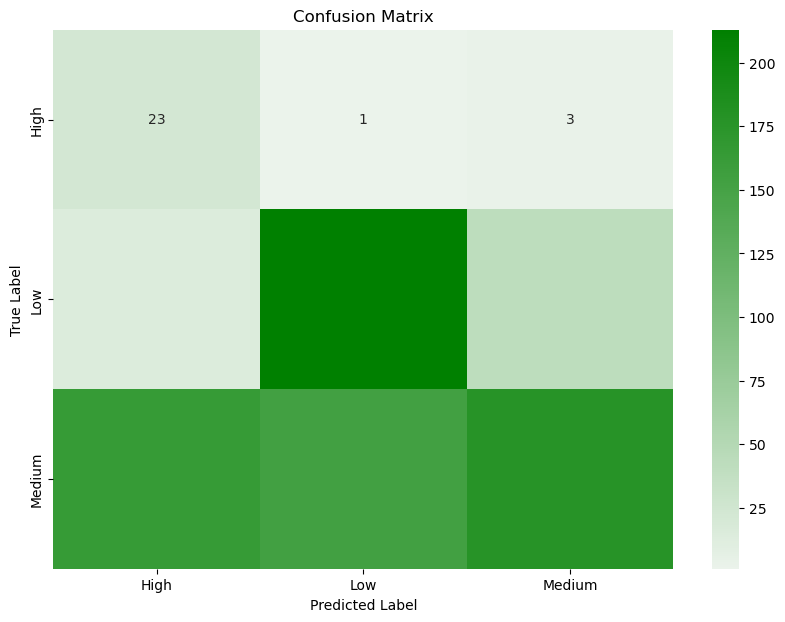

In [564]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
confusion_matrix = np.array([[23, 1, 3],
                             [15, 213, 42],
                             [164, 153, 178]])

# Define the labels for your confusion matrix (optional)
labels = ['High', 'Low', 'Medium']

# Create a custom colormap for pastel green nuances
cmap = sns.light_palette("green", as_cmap=True)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Classification Report 

In [328]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.11      0.85      0.20        27
         low       0.58      0.79      0.67       270
      medium       0.80      0.36      0.50       495

    accuracy                           0.52       792
   macro avg       0.50      0.67      0.46       792
weighted avg       0.70      0.52      0.54       792



In [329]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 23,   1,   3],
       [ 15, 213,  42],
       [164, 153, 178]])

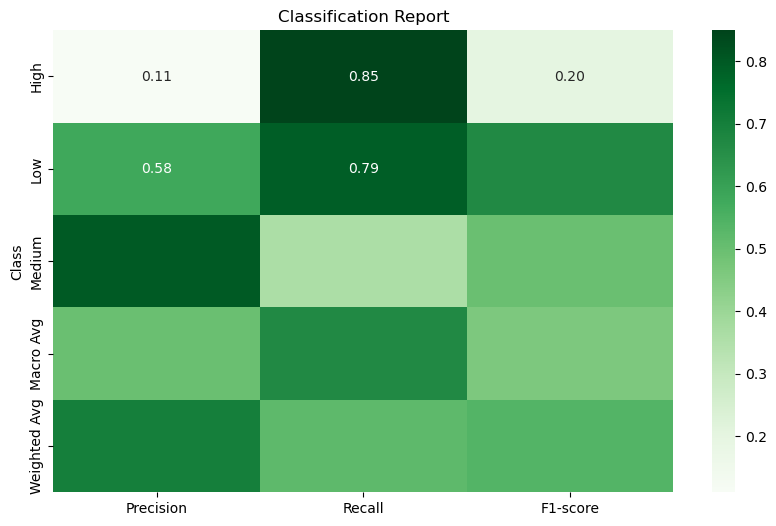

In [565]:
# Classification report data
data = {
    'Precision': [0.11, 0.58, 0.80, 0.50, 0.70],
    'Recall': [0.85, 0.79, 0.36, 0.67, 0.52],
    'F1-score': [0.20, 0.67, 0.50, 0.46, 0.54],
    'Support': [27, 270, 495, 792, 792]
}

rows = ['High', 'Low', 'Medium', 'Macro Avg', 'Weighted Avg']

# Create DataFrame
df = pd.DataFrame(data, index=rows)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Support', axis=1), annot=True, fmt=".2f", cmap='Greens')
plt.title('Classification Report')
plt.ylabel('Class')
plt.show()

## Tuning GridSearch CV for Undersampling with Random Forest

In [330]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming white_wine DataFrame and target variable are already defined

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Define RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Define the pipeline
pipeline = make_pipeline(under_sampler, model)

# Define the parameter grid for Random Forest
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, scoring='balanced_accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(white_wine.drop(['quality_label'], axis=1), target)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best balanced accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, rand

### Confusion Matrix FINAL

In [347]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[ 23,   3,   1],
       [ 17, 200,  53],
       [153, 162, 180]])

## CLASSIFICATION REPORT 

In [348]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.12      0.85      0.21        27
         low       0.55      0.74      0.63       270
      medium       0.77      0.36      0.49       495

    accuracy                           0.51       792
   macro avg       0.48      0.65      0.44       792
weighted avg       0.67      0.51      0.53       792



## Tuning RandomizedSearch CV for Undersampling with Random Forest

In [331]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from scipy.stats import randint

# Assuming white_wine DataFrame and target variable are already defined

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Define RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Define the pipeline
pipeline = make_pipeline(under_sampler, model)

# Define the parameter distribution for Random Forest
param_distributions = {
    'randomforestclassifier__n_estimators': randint(100, 500),
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 40],
    'randomforestclassifier__min_samples_split': randint(2, 11),
    'randomforestclassifier__min_samples_leaf': randint(1, 11)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=100, cv=skf, scoring='balanced_accuracy', verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(white_wine.drop(['quality_label'], axis=1), target)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best balanced accuracy: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=202; total time=   0.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=202; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=202; total time=   0.2s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=202; total time=   0.3s
[CV] END randomforestclassifier__max_depth=30, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestc

## Undersampling with SVM

In [332]:
model = SVC(random_state=42)
evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.4493
Fold 2 Balanced Accuracy: 0.4416
Fold 3 Balanced Accuracy: 0.4127
Fold 4 Balanced Accuracy: 0.4606
Fold 5 Balanced Accuracy: 0.4579

Average Balanced Accuracy: 0.4444


## Undersampling with Gradient Boosting

In [333]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5878
Fold 2 Balanced Accuracy: 0.5957
Fold 3 Balanced Accuracy: 0.5604
Fold 4 Balanced Accuracy: 0.5557
Fold 5 Balanced Accuracy: 0.6320

Average Balanced Accuracy: 0.5863


## Undersampling with K Nearest Neighbor

In [334]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
evaluate_model_with_undersampling(model, white_wine, 'quality_label', n_splits=5, random_state=42)


Fold 1 Balanced Accuracy: 0.4576
Fold 2 Balanced Accuracy: 0.4593
Fold 3 Balanced Accuracy: 0.3869
Fold 4 Balanced Accuracy: 0.4797
Fold 5 Balanced Accuracy: 0.4671

Average Balanced Accuracy: 0.4501


## Function x Model + SMOTE

In [335]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score

def evaluate_model_with_smote(model, data, target_column, n_splits=5, random_state=42):
    
    target = data[target_column]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    balanced_accuracies = []
    
    # Initialize SMOTE and the model within a pipeline
    pipeline = make_pipeline(SMOTE(random_state=random_state), model)
    
    for fold_no, (train_index, test_index) in enumerate(skf.split(data, target), start=1):
        # Create training and testing sets
        X_train = data.iloc[train_index].drop([target_column], axis=1)
        y_train = data.iloc[train_index][target_column]
        X_test = data.iloc[test_index].drop([target_column], axis=1)
        y_test = data.iloc[test_index][target_column]
        
        # Fit the pipeline on the training set and predict on the testing set
        pipeline.fit(X_train, y_train)
        pred = pipeline.predict(X_test)
        
        # Calculate and store the balanced accuracy
        balanced_accuracy = balanced_accuracy_score(y_test, pred)
        balanced_accuracies.append(balanced_accuracy)
        
        # Print balanced accuracy for the current fold
        print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')
    
    # Print average balanced accuracy after all folds
    average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')




### Random Forrest and SMOTE

In [336]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=453)

evaluate_model_with_smote(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5713
Fold 2 Balanced Accuracy: 0.5885
Fold 3 Balanced Accuracy: 0.5213
Fold 4 Balanced Accuracy: 0.5306
Fold 5 Balanced Accuracy: 0.5705

Average Balanced Accuracy: 0.5565


### Logistic Regression and SMOTE

In [337]:
#model = LogisticRegression(max_iter=1000, random_state=42)

#evaluate_model_with_smote(model, white_wine, 'quality_label', n_splits=5, random_state=42)

### Gradient Boosting Machines and SMOTE

In [338]:
from  sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=453)

evaluate_model_with_smote(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.5842
Fold 2 Balanced Accuracy: 0.5749
Fold 3 Balanced Accuracy: 0.5506
Fold 4 Balanced Accuracy: 0.5169
Fold 5 Balanced Accuracy: 0.5631

Average Balanced Accuracy: 0.5580


### Support Vector Machines and SMOTE

In [339]:
from sklearn.svm import SVC

model =SVC(random_state=42)

evaluate_model_with_smote(model, white_wine, 'quality_label', n_splits=5, random_state=42)



Fold 1 Balanced Accuracy: 0.5241
Fold 2 Balanced Accuracy: 0.5288
Fold 3 Balanced Accuracy: 0.4989
Fold 4 Balanced Accuracy: 0.5075
Fold 5 Balanced Accuracy: 0.5048

Average Balanced Accuracy: 0.5128


In [340]:
confusion_matrix(y_test, pred)

array([[ 23,   1,   3],
       [ 15, 213,  42],
       [164, 153, 178]])

## K-Nearest Neighbors (KNN) and SMOTE

In [341]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
evaluate_model_with_smote(model, white_wine, 'quality_label', n_splits=5, random_state=42)

Fold 1 Balanced Accuracy: 0.4939
Fold 2 Balanced Accuracy: 0.4169
Fold 3 Balanced Accuracy: 0.4820
Fold 4 Balanced Accuracy: 0.5157
Fold 5 Balanced Accuracy: 0.4568

Average Balanced Accuracy: 0.4731


### Highest % Stratified Kfold with SMOTE and Logistic Regression 

In [342]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming white_wine DataFrame and target variable are already defined

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
balanced_accuracies = []

# The model is already correctly defined with C=1.0
model = LogisticRegression(C=2.476375439923997, max_iter=1000, random_state=42)

# Define SMOTE with k_neighbors=3 as per best parameters
smote = SMOTE(k_neighbors=6, random_state=42)

# Use the defined SMOTE in the pipeline
pipeline = make_pipeline(smote, model)

for fold_no, (train_index, test_index) in enumerate(skf.split(white_wine, target), start=1):
    # Create training and testing sets
    X_train = white_wine.iloc[train_index].drop(['quality_label'], axis=1)
    y_train = target.iloc[train_index]
    X_test = white_wine.iloc[test_index].drop(['quality_label'], axis=1)
    y_test = target.iloc[test_index]
    
    # Fit the pipeline on the training set and predict on the testing set
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    
    # Calculate and store the balanced accuracy
    balanced_accuracy = balanced_accuracy_score(y_test, pred)
    balanced_accuracies.append(balanced_accuracy)
    
    # Print balanced accuracy for the current fold
    print(f'Fold {fold_no} Balanced Accuracy: {balanced_accuracy:.4f}')

# Print average balanced accuracy after all folds
average_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
print(f'\nAverage Balanced Accuracy: {average_balanced_accuracy:.4f}')


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1 Balanced Accuracy: 0.5965


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2 Balanced Accuracy: 0.6481


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3 Balanced Accuracy: 0.6046


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4 Balanced Accuracy: 0.6011
Fold 5 Balanced Accuracy: 0.6521

Average Balanced Accuracy: 0.6205


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.12      0.85      0.21        27
         low       0.55      0.74      0.63       270
      medium       0.77      0.36      0.49       495

    accuracy                           0.51       792
   macro avg       0.48      0.65      0.44       792
weighted avg       0.67      0.51      0.53       792



## Tuning GridSearchCV with oversampling, Stratified  Logistic Regression

In [345]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming your dataset is loaded into `white_wine` and `quality_label` is your target
target = white_wine['quality_label']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model and pipeline
model = LogisticRegression(random_state=42, max_iter=1000)
pipeline = make_pipeline(SMOTE(random_state=42), model)

# Define the parameter grid to search
param_grid = {
    'smote__k_neighbors': [3, 5, 7],  # Parameters for SMOTE
    'logisticregression__C': [0.1, 1.0, 10.0],  # Parameters for Logistic Regression
    # Add other parameters here if necessary
}

# Define the scorer
scorer = make_scorer(balanced_accuracy_score)

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=skf)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(white_wine.drop(['quality_label'], axis=1), target)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best Balanced Accuracy:", grid_search.best_score_)


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best parameters: {'logisticregression__C': 10.0, 'smote__k_neighbors': 5}
Best Balanced Accuracy: 0.6168423572019128


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tuning RandomizedSearchCV with oversampling, stratified Logistic Regression 

In [346]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint, uniform

# Define your pipeline
model = LogisticRegression(max_iter=1000, random_state=42)
smote = SMOTE(random_state=42)
pipeline = make_pipeline(smote, model)

# Parameter space
param_dist = {
    'smote__k_neighbors': sp_randint(1, 10),  # Random integers from 1 to 10
    'logisticregression__C': uniform(0.1, 10)  # Uniform distribution over [0.1, 10.1)
}

# StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=skf, verbose=2, random_state=42, scoring='balanced_accuracy', n_jobs=-1)

# Assuming 'X' and 'y' are your features and target variable
# Fit the RandomizedSearchCV object
random_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best balanced accuracy: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.086584841970366, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=3.845401188473625, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=3.845401188473625, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=3.845401188473625, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=3.845401188473625, smote__k_neighbors=8; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.086584841970366, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=3.845401188473625, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=6.086584841970366, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.086584841970366, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=4.558327528535911, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=4.558327528535911, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=4.558327528535911, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=4.558327528535911, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=6.086584841970366, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=4.558327528535911, smote__k_neighbors=7; total time=   0.9s
[CV] END logisticregression__C=0.6808361216819946, smote__k_neighbors=8; total time=   0.8s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.6808361216819946, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=0.6808361216819946, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=0.6808361216819946, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=3.4370861113902182, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=0.6808361216819946, smote__k_neighbors=8; total time=   0.9s
[CV] END logisticregression__C=3.4370861113902182, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=3.4370861113902182, smote__k_neighbors=8; total time=   0.8s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=3.4370861113902182, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.4370861113902182, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=7.180725777960454, smote__k_neighbors=6; total time=   0.9s
[CV] END logisticregression__C=7.180725777960454, smote__k_neighbors=6; total time=   1.0s
[CV] END logisticregression__C=7.180725777960454, smote__k_neighbors=6; total time=   0.9s
[CV] END logisticregression__C=7.180725777960454, smote__k_neighbors=6; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.6641157902710025, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=7.180725777960454, smote__k_neighbors=6; total time=   1.0s
[CV] END logisticregression__C=0.6641157902710025, smote__k_neighbors=8; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.6641157902710025, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=0.6641157902710025, smote__k_neighbors=8; total time=   0.9s
[CV] END logisticregression__C=0.6641157902710025, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=8.424426408004217, smote__k_neighbors=6; total time=   0.8s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.424426408004217, smote__k_neighbors=6; total time=   0.9s
[CV] END logisticregression__C=8.424426408004217, smote__k_neighbors=6; total time=   0.8s
[CV] END logisticregression__C=8.424426408004217, smote__k_neighbors=6; total time=   0.8s
[CV] END logisticregression__C=8.424426408004217, smote__k_neighbors=6; total time=   0.8s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.10778765841014329, smote__k_neighbors=5; total time=   1.0s
[CV] END logisticregression__C=0.10778765841014329, smote__k_neighbors=5; total time=   0.9s
[CV] END logisticregression__C=0.10778765841014329, smote__k_neighbors=5; total time=   1.0s
[CV] END logisticregression__C=0.10778765841014329, smote__k_neighbors=5; total time=   1.0s
[CV] END logisticregression__C=0.10778765841014329, smote__k_neighbors=5; total time=   0.9s
[CV] END logisticregression__C=6.274815096277165, smote__k_neighbors=6; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.274815096277165, smote__k_neighbors=6; total time=   1.0s
[CV] END logisticregression__C=6.274815096277165, smote__k_neighbors=6; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.274815096277165, smote__k_neighbors=6; total time=   0.9s
[CV] END logisticregression__C=6.274815096277165, smote__k_neighbors=6; total time=   0.9s
[CV] END logisticregression__C=0.17066305219717406, smote__k_neighbors=9; total time=   0.9s
[CV] END logisticregression__C=0.17066305219717406, smote__k_neighbors=9; total time=   0.9s
[CV] END logisticregression__C=0.17066305219717406, smote__k_neighbors=9; total time=   0.9s
[CV] END logisticregression__C=0.17066305219717406, smote__k_neighbors=9; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.17066305219717406, smote__k_neighbors=9; total time=   0.9s
[CV] END logisticregression__C=3.0122914019804194, smote__k_neighbors=3; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.0122914019804194, smote__k_neighbors=3; total time=   0.9s
[CV] END logisticregression__C=3.0122914019804194, smote__k_neighbors=3; total time=   1.0s
[CV] END logisticregression__C=3.0122914019804194, smote__k_neighbors=3; total time=   1.0s
[CV] END logisticregression__C=3.9246199126716275, smote__k_neighbors=4; total time=   0.8s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.9246199126716275, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=3.0122914019804194, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=3.9246199126716275, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=3.9246199126716275, smote__k_neighbors=4; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.9246199126716275, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=6.0241456886204245, smote__k_neighbors=3; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.0241456886204245, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=6.0241456886204245, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=6.0241456886204245, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=8.699404067363206, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=8.699404067363206, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=6.0241456886204245, smote__k_neighbors=3; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=8.699404067363206, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.699404067363206, smote__k_neighbors=7; total time=   1.3s
[CV] END logisticregression__C=8.699404067363206, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=1.8052412368729154, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=1.8052412368729154, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=1.8052412368729154, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=1.8052412368729154, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=1.8052412368729154, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2326496115986653, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=0.2326496115986653, smote__k_neighbors=9; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2326496115986653, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=0.2326496115986653, smote__k_neighbors=9; total time=   1.3s
[CV] END logisticregression__C=9.756320330745593, smote__k_neighbors=2; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2326496115986653, smote__k_neighbors=9; total time=   1.4s
[CV] END logisticregression__C=9.756320330745593, smote__k_neighbors=2; total time=   1.3s
[CV] END logisticregression__C=9.756320330745593, smote__k_neighbors=2; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.756320330745593, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=9.756320330745593, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=3.954165025399161, smote__k_neighbors=5; total time=   1.2s
[CV] END logisticregression__C=3.954165025399161, smote__k_neighbors=5; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.40893825622149, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=3.954165025399161, smote__k_neighbors=5; total time=   1.2s
[CV] END logisticregression__C=3.954165025399161, smote__k_neighbors=5; total time=   1.2s
[CV] END logisticregression__C=3.954165025399161, smote__k_neighbors=5; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.40893825622149, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=2.40893825622149, smote__k_neighbors=7; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.40893825622149, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=2.40893825622149, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=6.199966577826209, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=6.199966577826209, smote__k_neighbors=8; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.199966577826209, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=6.199966577826209, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.199966577826209, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=0.44388521115218393, smote__k_neighbors=1; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.44388521115218393, smote__k_neighbors=1; total time=   1.1s
[CV] END logisticregression__C=0.44388521115218393, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=0.44388521115218393, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.44388521115218393, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=2.6877998160001693, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=2.6877998160001693, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.6877998160001693, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=2.6877998160001693, smote__k_neighbors=8; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.6877998160001693, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=7.653614103176524, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=7.653614103176524, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=7.653614103176524, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=7.653614103176524, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=7.653614103176524, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.179416628681888, smote__k_neighbors=4; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.179416628681888, smote__k_neighbors=4; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.179416628681888, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=2.179416628681888, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=2.179416628681888, smote__k_neighbors=4; total time=   0.9s
[CV] END logisticregression__C=1.9485445552552705, smote__k_neighbors=2; total time=   0.9s
[CV] END logisticregression__C=1.9485445552552705, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.9485445552552705, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.9485445552552705, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.9485445552552705, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.851328233611145, smote__k_neighbors=2; total time=   1.0s
[CV] END logisticregression__C=7.851328233611145, smote__k_neighbors=2; total time=   0.9s
[CV] END logisticregression__C=7.851328233611145, smote__k_neighbors=2; total time=   1.0s
[CV] END logisticregression__C=7.851328233611145, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=7.851328233611145, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=4.051502360018144, smote__k_neighbors=4; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=4.051502360018144, smote__k_neighbors=4; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=4.051502360018144, smote__k_neighbors=4; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.051502360018144, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=6.078999788110851, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=6.078999788110851, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=6.078999788110851, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=6.078999788110851, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=4.051502360018144, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=6.078999788110851, smote__k_neighbors=8; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=5.804439744053994, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.804439744053994, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.804439744053994, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.804439744053994, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.804439744053994, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=9.71172024349349, smote__k_neighbors=5; total time=   1.1s
[CV] END logisticregression__C=9.71172024349349, smote__k_neighbors=5; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.71172024349349, smote__k_neighbors=5; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.71172024349349, smote__k_neighbors=5; total time=   1.1s
[CV] END logisticregression__C=9.71172024349349, smote__k_neighbors=5; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.9867728968948204, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=3.9867728968948204, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=3.9867728968948204, smote__k_neighbors=2; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.9867728968948204, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=3.9867728968948204, smote__k_neighbors=2; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.496921323890797, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=5.496921323890797, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.496921323890797, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=5.496921323890797, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=5.496921323890797, smote__k_neighbors=8; total time=   0.9s
[CV] END logisticregression__C=3.667533266935893, smote__k_neighbors=9; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.667533266935893, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=3.667533266935893, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.667533266935893, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=3.667533266935893, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.062735057040824, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=3.062735057040824, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=3.062735057040824, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=3.062735057040824, smote__k_neighbors=1; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2563640674119393, smote__k_neighbors=9; total time=   1.4s
[CV] END logisticregression__C=3.062735057040824, smote__k_neighbors=1; total time=   1.6s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2563640674119393, smote__k_neighbors=9; total time=   1.6s
[CV] END logisticregression__C=0.2563640674119393, smote__k_neighbors=9; total time=   1.6s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2563640674119393, smote__k_neighbors=9; total time=   1.3s
[CV] END logisticregression__C=0.2563640674119393, smote__k_neighbors=9; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.822447692966573, smote__k_neighbors=8; total time=   1.4s
[CV] END logisticregression__C=7.822447692966573, smote__k_neighbors=8; total time=   1.6s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.822447692966573, smote__k_neighbors=8; total time=   1.5s
[CV] END logisticregression__C=7.822447692966573, smote__k_neighbors=8; total time=   1.5s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.822447692966573, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=0.155221171236024, smote__k_neighbors=3; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.155221171236024, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=0.155221171236024, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=0.155221171236024, smote__k_neighbors=3; total time=   1.0s
[CV] END logisticregression__C=0.155221171236024, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.168573438476171, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=7.168573438476171, smote__k_neighbors=3; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.168573438476171, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=7.168573438476171, smote__k_neighbors=3; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.001755405312057, smote__k_neighbors=5; total time=   1.4s
[CV] END logisticregression__C=8.001755405312057, smote__k_neighbors=5; total time=   1.3s
[CV] END logisticregression__C=8.001755405312057, smote__k_neighbors=5; total time=   1.3s
[CV] END logisticregression__C=7.168573438476171, smote__k_neighbors=3; total time=   1.6s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.001755405312057, smote__k_neighbors=5; total time=   1.3s
[CV] END logisticregression__C=8.001755405312057, smote__k_neighbors=5; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.36300878513349, smote__k_neighbors=9; total time=   1.3s
[CV] END logisticregression__C=9.36300878513349, smote__k_neighbors=9; total time=   1.4s
[CV] END logisticregression__C=9.36300878513349, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=9.36300878513349, smote__k_neighbors=9; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.36300878513349, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=9.249596755437807, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.249596755437807, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=9.249596755437807, smote__k_neighbors=9; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.249596755437807, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=9.249596755437807, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=6.332981268275579, smote__k_neighbors=2; total time=   0.9s
[CV] END logisticregression__C=6.332981268275579, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.332981268275579, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=6.332981268275579, smote__k_neighbors=2; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=6.332981268275579, smote__k_neighbors=2; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.0541011649041132, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.0541011649041132, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=1.0541011649041132, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=1.0541011649041132, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=1.0541011649041132, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.209823217156622, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=3.209823217156622, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=3.209823217156622, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=3.209823217156622, smote__k_neighbors=8; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.759223566174966, smote__k_neighbors=8; total time=   0.8s
[CV] END logisticregression__C=6.759223566174966, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=3.209823217156622, smote__k_neighbors=8; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.759223566174966, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=6.759223566174966, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=6.759223566174966, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=2.847217929900642, smote__k_neighbors=3; total time=   1.0s
[CV] END logisticregression__C=2.847217929900642, smote__k_neighbors=3; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.847217929900642, smote__k_neighbors=3; total time=   1.0s
[CV] END logisticregression__C=2.847217929900642, smote__k_neighbors=3; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.847217929900642, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=4.822149251619493, smote__k_neighbors=5; total time=   1.0s
[CV] END logisticregression__C=4.822149251619493, smote__k_neighbors=5; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.822149251619493, smote__k_neighbors=5; total time=   0.9s
[CV] END logisticregression__C=4.822149251619493, smote__k_neighbors=5; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=4.822149251619493, smote__k_neighbors=5; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=9.817120953891036, smote__k_neighbors=3; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.817120953891036, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=9.817120953891036, smote__k_neighbors=3; total time=   1.2s
[CV] END logisticregression__C=9.817120953891036, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.707850486168974, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=7.707850486168974, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=9.817120953891036, smote__k_neighbors=3; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=7.707850486168974, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.707850486168974, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=7.707850486168974, smote__k_neighbors=7; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.80967179954561, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=7.80967179954561, smote__k_neighbors=7; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.80967179954561, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=7.80967179954561, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=7.80967179954561, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.5043358953843134, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.5043358953843134, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=0.5043358953843134, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.5043358953843134, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.5043358953843134, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=0.4142918568673425, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.4142918568673425, smote__k_neighbors=7; total time=   1.3s
[CV] END logisticregression__C=0.4142918568673425, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.4142918568673425, smote__k_neighbors=7; total time=   1.4s
[CV] END logisticregression__C=0.4142918568673425, smote__k_neighbors=7; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.853702231821117, smote__k_neighbors=4; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.853702231821117, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=4.853702231821117, smote__k_neighbors=4; total time=   1.6s
[CV] END logisticregression__C=4.853702231821117, smote__k_neighbors=4; total time=   1.4s
[CV] END logisticregression__C=9.17566473926093, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=4.853702231821117, smote__k_neighbors=4; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.17566473926093, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=9.17566473926093, smote__k_neighbors=7; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.17566473926093, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=6.144173792778172, smote__k_neighbors=4; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.17566473926093, smote__k_neighbors=7; total time=   1.0s
[CV] END logisticregression__C=6.144173792778172, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=6.144173792778172, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=6.144173792778172, smote__k_neighbors=4; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.144173792778172, smote__k_neighbors=4; total time=   1.1s
[CV] END logisticregression__C=9.52853570557981, smote__k_neighbors=7; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.52853570557981, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=9.52853570557981, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.52853570557981, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=2.9975145291376806, smote__k_neighbors=6; total time=   1.0s
[CV] END logisticregression__C=9.52853570557981, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=2.9975145291376806, smote__k_neighbors=6; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.9975145291376806, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.9975145291376806, smote__k_neighbors=6; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.9975145291376806, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=8.904678390152577, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.904678390152577, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=8.904678390152577, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=8.904678390152577, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=8.904678390152577, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.1549425983027062, smote__k_neighbors=4; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.1549425983027062, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.1549425983027062, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=1.1549425983027062, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.1549425983027062, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=9.025589984899778, smote__k_neighbors=7; total time=   1.3s
[CV] END logisticregression__C=9.025589984899778, smote__k_neighbors=7; total time=   1.4s
[CV] END logisticregression__C=9.025589984899778, smote__k_neighbors=7; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.025589984899778, smote__k_neighbors=7; total time=   1.4s
[CV] END logisticregression__C=9.025589984899778, smote__k_neighbors=7; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.060912999234931, smote__k_neighbors=7; total time=   1.3s
[CV] END logisticregression__C=9.060912999234931, smote__k_neighbors=7; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.060912999234931, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=9.060912999234931, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=9.16828441545754, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=9.060912999234931, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.16828441545754, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=9.16828441545754, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.16828441545754, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=2.379351625419417, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=2.379351625419417, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.16828441545754, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=2.379351625419417, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=2.379351625419417, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.379351625419417, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=8.28014765922493, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.28014765922493, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=8.28014765922493, smote__k_neighbors=9; total time=   1.0s
[CV] END logisticregression__C=8.28014765922493, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.14781258158029, smote__k_neighbors=6; total time=   1.0s
[CV] END logisticregression__C=8.28014765922493, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=3.14781258158029, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.14781258158029, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=3.14781258158029, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.14781258158029, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=5.207473025775657, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.207473025775657, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.207473025775657, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.207473025775657, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=5.207473025775657, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.948299713589831, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=4.948299713589831, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=4.948299713589831, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=4.948299713589831, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=4.948299713589831, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.2986536733368281, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=1.2986536733368281, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=1.2986536733368281, smote__k_neighbors=8; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.2986536733368281, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=1.2986536733368281, smote__k_neighbors=8; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.529097039125192, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=9.529097039125192, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=9.529097039125192, smote__k_neighbors=6; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.529097039125192, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=2.2876421957307023, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=9.529097039125192, smote__k_neighbors=6; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.2876421957307023, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=2.2876421957307023, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.2876421957307023, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.130189588951778, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=7.130189588951778, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=2.2876421957307023, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=7.130189588951778, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=7.130189588951778, smote__k_neighbors=1; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.130189588951778, smote__k_neighbors=1; total time=   1.5s
[CV] END logisticregression__C=0.7489224710898156, smote__k_neighbors=4; total time=   1.5s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.7489224710898156, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=0.7489224710898156, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=2.5687606283860123, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=0.7489224710898156, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=0.7489224710898156, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.5687606283860123, smote__k_neighbors=7; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.5687606283860123, smote__k_neighbors=7; total time=   1.1s
[CV] END logisticregression__C=2.5687606283860123, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.5687606283860123, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=5.072485058923855, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=5.072485058923855, smote__k_neighbors=1; total time=   1.1s
[CV] END logisticregression__C=5.072485058923855, smote__k_neighbors=1; total time=   1.1s
[CV] END logisticregression__C=5.072485058923855, smote__k_neighbors=1; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=5.072485058923855, smote__k_neighbors=1; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.580869299533999, smote__k_neighbors=8; total time=   1.1s
[CV] END logisticregression__C=1.580869299533999, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.580869299533999, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=1.580869299533999, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=1.580869299533999, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.46886947354532793, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=0.46886947354532793, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=0.46886947354532793, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.46886947354532793, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=0.46886947354532793, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.866149558326528, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=9.866149558326528, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=9.866149558326528, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=9.866149558326528, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=9.866149558326528, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.43050732900548383, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.43050732900548383, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=0.43050732900548383, smote__k_neighbors=1; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.443513447013638, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=0.43050732900548383, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=6.443513447013638, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=6.443513447013638, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=0.43050732900548383, smote__k_neighbors=1; total time=   1.4s
[CV] END logisticregression__C=6.443513447013638, smote__k_neighbors=2; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.443513447013638, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=5.409345833171363, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.409345833171363, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=5.409345833171363, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=2.5205527151150044, smote__k_neighbors=4; total time=   1.1s
[CV] END logisticregression__C=2.5205527151150044, smote__k_neighbors=4; total time=   1.1s
[CV] END logisticregression__C=5.409345833171363, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=5.409345833171363, smote__k_neighbors=6; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.5205527151150044, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=2.5205527151150044, smote__k_neighbors=4; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.5205527151150044, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=0.9085332633271525, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=0.9085332633271525, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=0.9085332633271525, smote__k_neighbors=8; total time=   1.3s
[CV] END logisticregression__C=0.9085332633271525, smote__k_neighbors=8; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=0.9085332633271525, smote__k_neighbors=8; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=2.476375439923997, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.476375439923997, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=2.476375439923997, smote__k_neighbors=6; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.777831327192532, smote__k_neighbors=4; total time=   1.0s
[CV] END logisticregression__C=2.476375439923997, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=2.476375439923997, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=3.777831327192532, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=3.777831327192532, smote__k_neighbors=4; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.777831327192532, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=9.93423140894843, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.777831327192532, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=9.93423140894843, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=9.93423140894843, smote__k_neighbors=6; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.93423140894843, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=9.93423140894843, smote__k_neighbors=6; total time=   1.1s
[CV] END logisticregression__C=5.457746840747585, smote__k_neighbors=1; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=5.457746840747585, smote__k_neighbors=1; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.457746840747585, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=5.457746840747585, smote__k_neighbors=1; total time=   1.3s
[CV] END logisticregression__C=5.457746840747585, smote__k_neighbors=1; total time=   1.2s
[CV] END logisticregression__C=1.6071754396542948, smote__k_neighbors=6; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.6071754396542948, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=1.6071754396542948, smote__k_neighbors=6; total time=   1.2s
[CV] END logisticregression__C=1.6071754396542948, smote__k_neighbors=6; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=1.6071754396542948, smote__k_neighbors=6; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.058128067908818, smote__k_neighbors=3; total time=   1.2s
[CV] END logisticregression__C=7.058128067908818, smote__k_neighbors=3; total time=   1.2s
[CV] END logisticregression__C=7.058128067908818, smote__k_neighbors=3; total time=   1.2s
[CV] END logisticregression__C=7.058128067908818, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=7.058128067908818, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=6.008929431882418, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=6.008929431882418, smote__k_neighbors=4; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=6.008929431882418, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2658782892785615, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=6.008929431882418, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=6.008929431882418, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=0.2658782892785615, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=0.2658782892785615, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=0.2658782892785615, smote__k_neighbors=3; total time=   1.1s
[CV] END logisticregression__C=0.2658782892785615, smote__k_neighbors=3; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=8.195010461397153, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.195010461397153, smote__k_neighbors=4; total time=   0.9s
[CV] END logisticregression__C=8.195010461397153, smote__k_neighbors=4; total time=   1.1s
[CV] END logisticregression__C=8.195010461397153, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.195010461397153, smote__k_neighbors=4; total time=   1.2s
[CV] END logisticregression__C=6.5517279040944985, smote__k_neighbors=4; total time=   1.1s
[CV] END logisticregression__C=6.5517279040944985, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=6.5517279040944985, smote__k_neighbors=4; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=6.5517279040944985, smote__k_neighbors=4; total time=   1.3s
[CV] END logisticregression__C=6.5517279040944985, smote__k_neighbors=4; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.50523264489604, smote__k_neighbors=8; total time=   1.0s
[CV] END logisticregression__C=9.50523264489604, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=9.50523264489604, smote__k_neighbors=8; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=9.50523264489604, smote__k_neighbors=8; total time=   1.2s
[CV] END logisticregression__C=3.967353463005374, smote__k_neighbors=2; total time=   1.2s
[CV] END logisticregression__C=9.50523264489604, smote__k_neighbors=8; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.967353463005374, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=3.967353463005374, smote__k_neighbors=2; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=3.967353463005374, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=3.967353463005374, smote__k_neighbors=2; total time=   1.1s
[CV] END logisticregression__C=8.477101059073279, smote__k_neighbors=9; total time=   1.1s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.477101059073279, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=8.477101059073279, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=8.477101059073279, smote__k_neighbors=9; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=8.477101059073279, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=1.2347352124058908, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=1.2347352124058908, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=1.2347352124058908, smote__k_neighbors=7; total time=   1.2s
[CV] END logisticregression__C=1.2347352124058908, smote__k_neighbors=7; total time=   1.4s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.514479738275658, smote__k_neighbors=3; total time=   1.2s
[CV] END logisticregression__C=1.2347352124058908, smote__k_neighbors=7; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=5.514479738275658, smote__k_neighbors=3; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.514479738275658, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=5.514479738275658, smote__k_neighbors=3; total time=   1.3s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.514479738275658, smote__k_neighbors=3; total time=   1.3s
[CV] END logisticregression__C=2.385500217972997, smote__k_neighbors=9; total time=   1.3s
[CV] END logisticregression__C=2.385500217972997, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.385500217972997, smote__k_neighbors=9; total time=   1.2s
[CV] END logisticregression__C=2.385500217972997, smote__k_neighbors=9; total time=   1.2s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=2.385500217972997, smote__k_neighbors=9; total time=   1.1s
[CV] END logisticregression__C=5.2663589127101424, smote__k_neighbors=1; total time=   1.0s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[CV] END logisticregression__C=5.2663589127101424, smote__k_neighbors=1; total time=   1.0s
[CV] END logisticregression__C=5.2663589127101424, smote__k_neighbors=1; total time=   0.9s
[CV] END logisticregression__C=5.2663589127101424, smote__k_neighbors=1; total time=   0.9s


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END logisticregression__C=5.2663589127101424, smote__k_neighbors=1; total time=   1.0s
Best parameters found:  {'logisticregression__C': 2.476375439923997, 'smote__k_neighbors': 6}
Best balanced accuracy:  0.6204832453710216


/Users/pierreloyal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
